In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msn
import seaborn as sns
import plotly.express as px

# Reading data

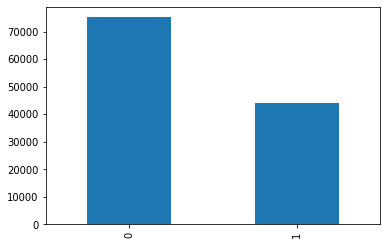

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
df = pd.read_csv('hotel_bookings.csv')
df.is_canceled.value_counts().plot(kind='bar')
plt.show()
df.head()

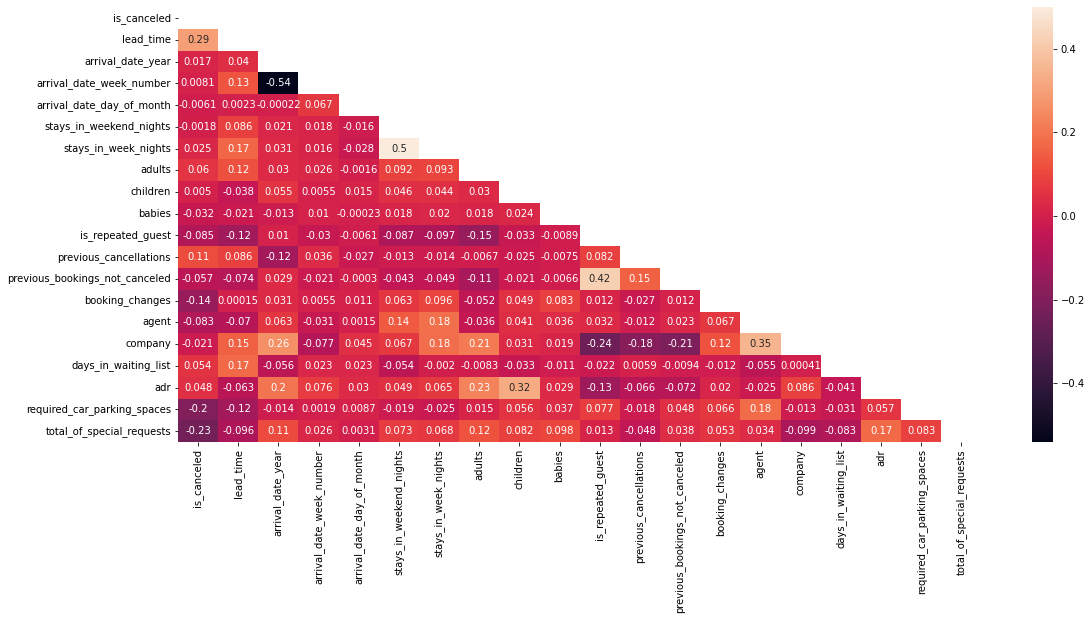

In [4]:
cor = df.corr()
mask = np.zeros_like(cor, dtype=bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(18, 8))
sns.heatmap(cor, mask=mask, annot=True)
plt.show()

In [5]:
cor.is_canceled.abs().sort_values(ascending=False)

is_canceled                       1.000000
lead_time                         0.293123
total_of_special_requests         0.234658
required_car_parking_spaces       0.195498
booking_changes                   0.144381
previous_cancellations            0.110133
is_repeated_guest                 0.084793
agent                             0.083114
adults                            0.060017
previous_bookings_not_canceled    0.057358
days_in_waiting_list              0.054186
adr                               0.047557
babies                            0.032491
stays_in_week_nights              0.024765
company                           0.020642
arrival_date_year                 0.016660
arrival_date_week_number          0.008148
arrival_date_day_of_month         0.006130
children                          0.005048
stays_in_weekend_nights           0.001791
Name: is_canceled, dtype: float64

In [6]:
fig = px.imshow(cor, width=700, height=700)
fig.show()

# Data cleaning and managing missing values

In [7]:
df.loc[df.agent.isnull() == False, 'agent'] = 'Agent'
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,Agent,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,Agent,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [8]:
df.agent.fillna('No_Agent', inplace=True)

In [9]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,No_Agent,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,No_Agent,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,No_Agent,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,Agent,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,Agent,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


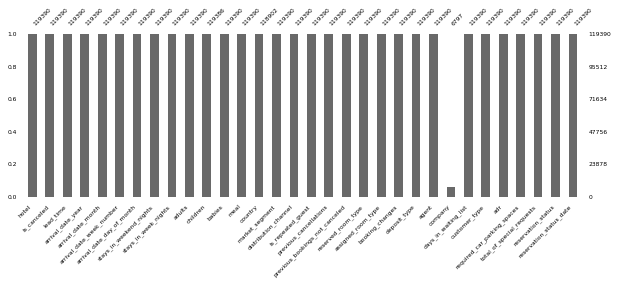

children         4
country        488
company     112593
dtype: int64

In [10]:
NaN = df.isnull().sum()[df.isnull().sum() > 0]
msn.bar(df, figsize=(10, 3), fontsize=6)
plt.show()
NaN


In [11]:
df.country.fillna('unknown', inplace=True)

In [12]:
df.children.fillna(0, inplace=True)

In [13]:
df.isnull().sum()[df.isnull().sum()>0]

company    112593
dtype: int64

In [14]:
df.loc[(df.market_segment == 'Corporate') | (df.distribution_channel == 'Corporate') & (df.company.isnull() == True), 'company'] = 'Corporate'

In [15]:
df.company.fillna('Individuals', inplace=True)

In [16]:
df.loc[(df.company.isnull() == False) & (
    df.company != 'Individuals'), 'company'] = 'Corporate'

In [17]:
df.company.value_counts()

Individuals    110912
Corporate        8478
Name: company, dtype: int64

Series([], dtype: int64)

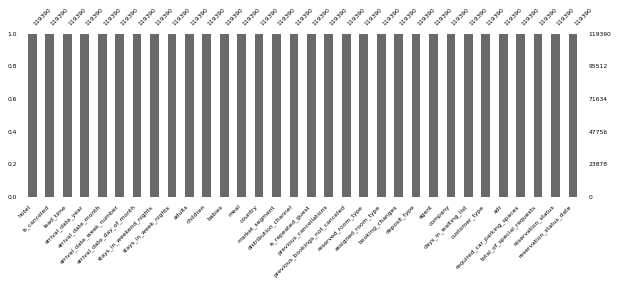

In [18]:
msn.bar(df, figsize=(10,3), fontsize=6)
plt.show
df.isnull().sum()[df.isnull().sum()>0]

In [19]:
df = df.drop_duplicates(keep='first').reset_index().drop('index', axis=1)

In [20]:
df.arrival_date_year = df.arrival_date_year.astype(object)

Bin countries

In [21]:
df.country.unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', 'unknown', 'ROU', 'NOR',
       'OMN', 'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA',
       'NLD', 'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN',
       'MOZ', 'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR',
       'UKR', 'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU',
       'TUR', 'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA',
       'KOR', 'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN',
       'GEO', 'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY',
       'KWT', 'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN',
       'LBN', 'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM',
       'MKD', 'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS',
       'COM', 'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI',
       'SAU', 'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU',
       'MDG', 'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI',
       'STP', 'KN

In [22]:
eu = ['PRT', 'GBR', 'ESP', 'IRL', 'FRA', 'ROU', 'NOR', 'POL', 'DEU', 'BEL', 'CHE', 'GRC', 'ITA',
       'NLD', 'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'LUX', 'SVN', 'ALB', 'UKR', 'SMR', 'LVA', 'SRB', 'AUT', 'BLR', 'LTU','TUR','HUN','HRV','GEO','AND','SVK',
       'MKD','BIH','BGR','MLT','ISL','MCO','LIE','MNE']
n_am = ['USA','MEX','PRI','CRI','CUB','HND','NIC','GAB','PAN','SLV','GTM']
s_am = ['ARG', 'BRA', 'CHL', 'URY', 'COL', 'VEN',
        'SUR', 'PER', 'ECU', 'BOL', 'PRY', 'GUY']
asia = ['OMN', 'CN', 'IND', 'CHN', 'ISR', 'KOR', 'ARE', 'HKG', 'IRN', 'CYP', 'KWT', 'MDV', 'KAZ', 'PAK', 'IDN', 'LBN', 'PHL', 'AZE', 'BHR',
        'THA', 'MYS', 'ARM', 'JPN', 'LKA', 'JOR', 'SYR', 'SGP', 'SAU', 'VNM', 'QAT', 'UZB', 'NPL', 'MAC', 'TWN', 'IRQ', 'KHM', 'BGD', 'TJK',
        'TMP', 'MMR', 'LAO']
africa = ['MOZ', 'BWA', 'MAR', 'ZAF', 'AGO', 'ZMB', 'ZWE', 'DZA', 'TUN', 'CAF', 'NGA', 'SEN', 'SYC', 'CMR', 'MUS', 'COM', 'UGA', 'CIV',
          'BDI', 'EGY', 'MWI', 'MDG', 'TGO', 'DJI', 'STP', 'ETH', 'RWA', 'BEN', 'TZA', 'GHA', 'KEN', 'GNB', 'BFA', 'LBY', 'MLI', 'NAM',
          'MRT', 'SDN', 'SLE']

australia = ['AUS']
other = ['CYM', 'CPV', 'JAM', 'GIB', 'JEY', 'GGY', 'FJI', 'NZL', 'DOM', 'PLW', 'BHS', 'KNA', 'IMN', 'VGB', 'GLP', 'UMI', 'MYT', 'FRO',
          'BRB', 'ABW', 'AIA', 'DMA', 'PYF', 'LCA', 'ATA', 'ASM', 'NCL', 'KIR', 'ATF']
unkw = ['unknown']


In [23]:
def bin_country(x):
    if x in eu:
        return 'eu'
    elif x in n_am:
        return 'n_am'
    elif x in s_am:
        return 's_am'
    elif x in asia:
        return 'asia'
    elif x in africa:
        return 'africa'
    elif x in australia:
        return 'australia'
    elif x in other:
        return 'other'
    elif x in unkw:
        return 'unknown'

In [24]:
df.country = df.country.apply(bin_country)

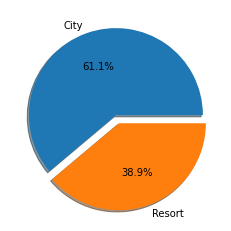

In [25]:
plt.figure(figsize=(4,4))
plt.pie(df.hotel.value_counts(), labels=['City', 'Resort'], autopct='%1.1f%%', explode=(0, 0.1), shadow=True)
plt.show()

### Variable Hotel over cancellation

<Figure size 216x216 with 0 Axes>

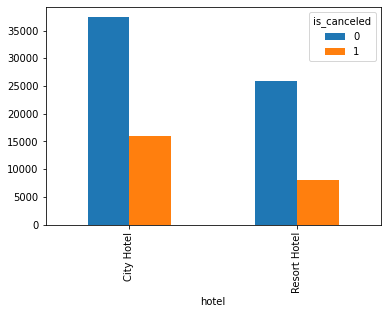

In [26]:
plt.figure(figsize=(3,3))
pd.crosstab(df.hotel, df.is_canceled).plot(kind='bar')
plt.show()

In [27]:
ct = pd.crosstab(df.hotel, df.is_canceled, margins=True)
ct['cancel_%'] = (ct[1]/ct['All'])*100

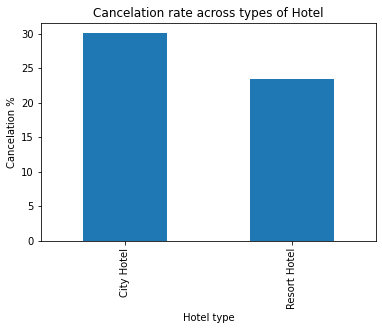

In [28]:
ct.drop('All', axis=0)['cancel_%'].plot(kind='bar')
plt.title('Cancelation rate across types of Hotel')
plt.xlabel('Hotel type')
plt.ylabel('Cancelation %')
plt.show()

### Variable lead_time over cancellation

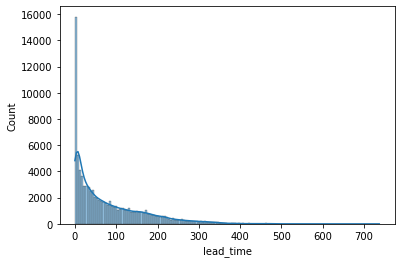

In [29]:
sns.histplot(df.lead_time, kde=True)
plt.show()

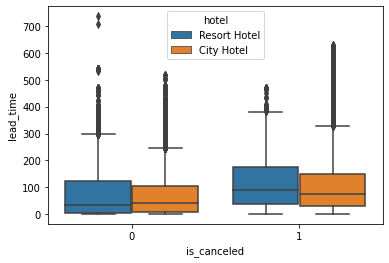

In [31]:
sns.boxplot(df, x='is_canceled', y='lead_time', hue='hotel')
plt.show()

### Variable arrival_date_year over cancellation

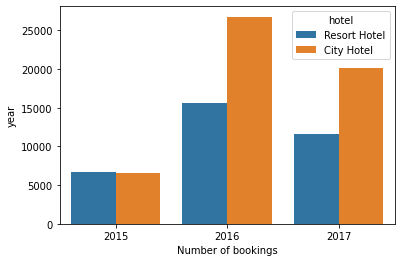

In [43]:
sns.countplot(df, x='arrival_date_year', hue='hotel')
plt.xlabel('Number of bookings')
plt.ylabel('year')
plt.show()

In [47]:
ct = pd.crosstab(df.arrival_date_year, df.is_canceled, margins=True)
ct['cancel_%'] = (ct[1]/ct.All)*100
ct.drop('All', axis=0, inplace=True)

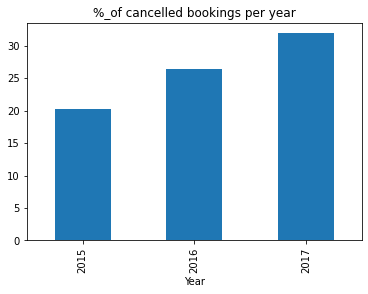

In [119]:
ct['cancel_%'].plot(kind='bar')
plt.xlabel('Year')
plt.title('%_of cancelled bookings per year')
plt.show()

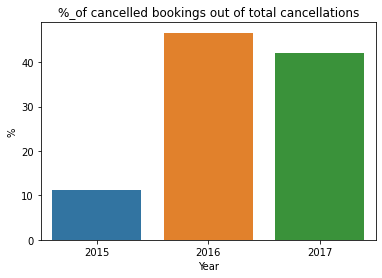

In [117]:
a = pd.DataFrame(df[df.is_canceled==1].arrival_date_year.value_counts()/(df[df.is_canceled==1].arrival_date_year.value_counts().sum())*100).reset_index()
a.columns=['year', '%']
sns.barplot(a, x='year', y='%')
plt.xlabel('Year')
plt.title('%_of cancelled bookings out of total cancellations')
plt.show()